# Facial Keypoints Detection - SP 

In [83]:
# Import the necessary packages

import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Unzip + extract data 
#data_archive = zipfile.ZipFile('/Users/sandip/Desktop/blackboxes/data/data.zip', 'r')

IdLookupTable = pd.read_csv('/Users/sandip/Desktop/blackboxes/data/IdLookupTable.csv', header=0, sep=',', quotechar='"')
SampleSubmission = pd.read_csv('/Users/sandip/Desktop/blackboxes/data/SampleSubmission.csv', header=0, sep=',', quotechar='"')

# Unzip + extract train data
train_archive = zipfile.ZipFile('/Users/sandip/Desktop/blackboxes/data/training.zip', 'r')
train_data = pd.read_csv(train_archive.open('training.csv'), header=0, sep=',', quotechar='"')

# Unzip + extract testing data
test_archive = zipfile.ZipFile('/Users/sandip/Desktop/blackboxes/data/test.zip', 'r')
test_data = pd.read_csv(test_archive.open('test.csv'), header=0, sep=',', quotechar='"')

In [3]:
train_data.shape

(7049, 31)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

## Which columns have missing values?

In [4]:
for i in train_data.columns:
    print(i,"has",sum(train_data[i].isna()),"missing values")
    
print(len(train_data.columns))

NameError: name 'train_data' is not defined

All rows have an Image. Most rows have a:
* nose_tip (x, y)
* left_eye_center (x,y)
* right_eye_center (x,y)
* mouth_center_bottom_lip (x,y)

## How many rows have missing values?

In [20]:
missing_counts=[]
i=0
for i in range(train_data.shape[0]):
    row=train_data.iloc[i,:]
    missing_count=sum(row.isna())
    if missing_count !=0:
        #print("row",i,"has",missing_count,"missing values")
        missing_counts.append(missing_count)

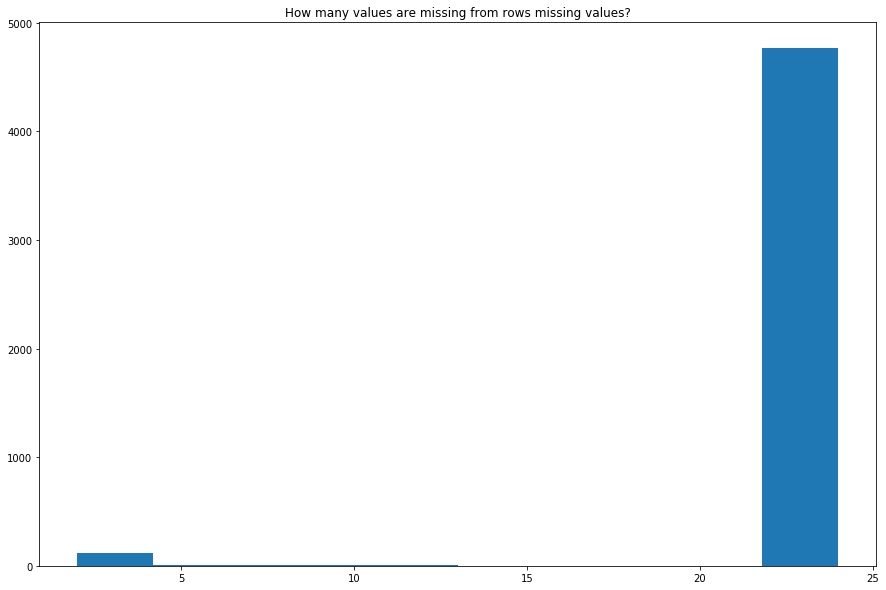

In [21]:
missing_array=np.array(missing_counts)
fig, ax = plt.subplots(figsize =(15, 10)) 
ax.hist(missing_array)
plt.title("How many values are missing from rows missing values?")
plt.show()

In [27]:
pd.Series(missing_array).value_counts()

22    4755
2       87
4       28
24      10
6        9
8        8
12       5
10       3
14       2
20       2
dtype: int64

## Looking at the values we do have

In [5]:
train_data.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


## Function to plot images and keypoints

In [6]:
def plot_img(data, indexes, columns=5, points=1):
    
    # Determine size of image array
    plt.figure(figsize = (15,10))
    rows = len(indexes)//columns + 1
    
    # Transform image strings into arrays
    for index, value in enumerate(indexes):
        image_array = np.fromstring(data.loc[value, 'Image'], sep = ' ').astype(int).reshape(96, 96)
        # Optional add keypoints
        if points == 1:
            keypoints = train_data.loc[value].drop('Image').values.astype(float).reshape(-1, 2)
        else:
            keypoints = []
            
        # Plot figure matrix 
        plt.subplot(rows, columns, index+1)
        plt.title('Training Sample: {}'.format(index+1))
        plt.axis('off')
        plt.imshow(image_array, cmap='gray')
        plt.tight_layout()
        # Add keypoints
        plt.scatter(keypoints[:, 0], keypoints[:, 1], s = 10, marker='.', c = 'red')
    plt.show() 
    
    return

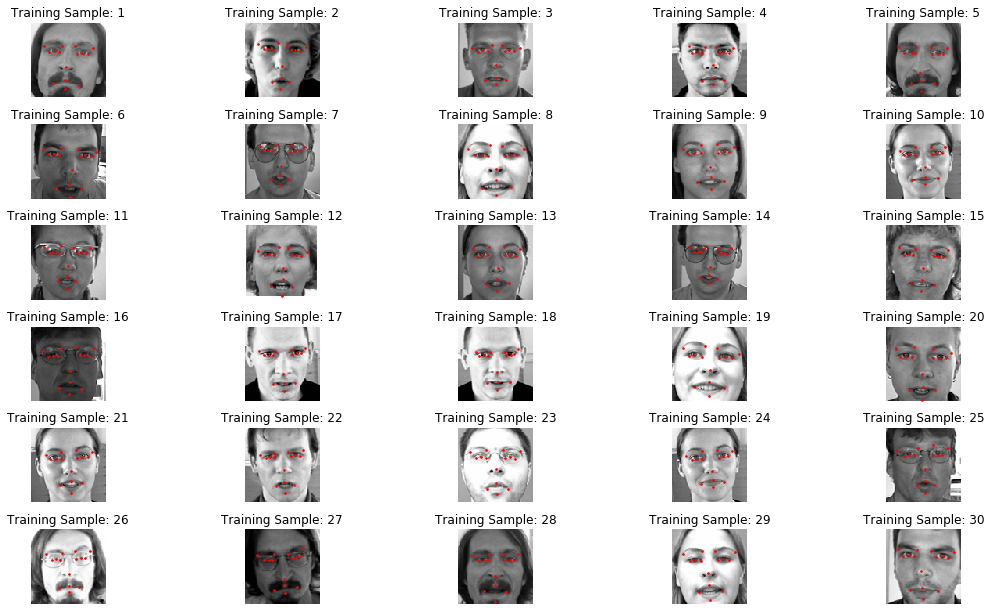

In [7]:
plot_img(train_data, range(30))

## Lets look at some of the values with missing datapoints:

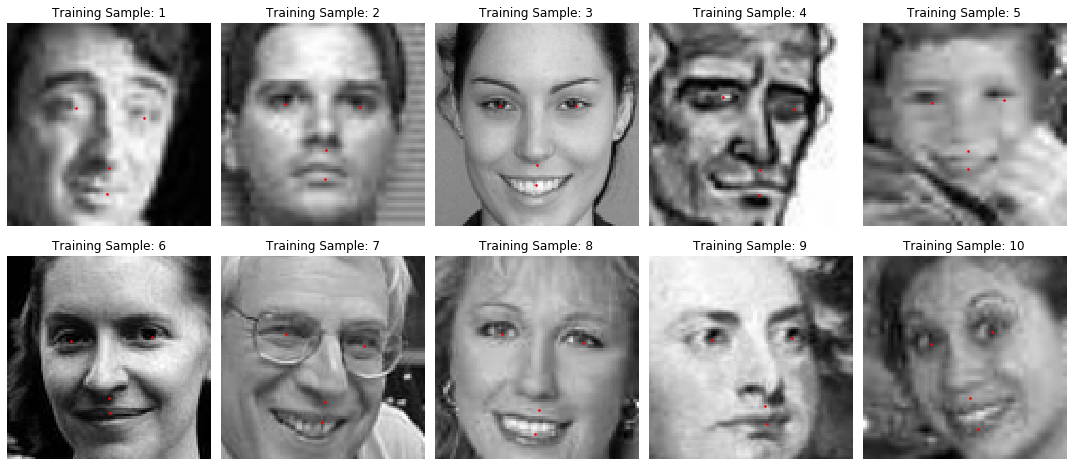

In [8]:
indexes = np.random.choice(train_data[train_data.isnull().any(axis=1)].index, 10)
plot_img(train_data, indexes)

Not only are there missing data points but there are also blurred images. 

It also seems that for some of these, only portions of data are missing and some of the images are not of real people.

## Test out some simple models for performance

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import sklearn.metrics as metrics

In [ ]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

## Prep Data

In [48]:
# Define feature and target columns
feature_col, target_cols = 'Image', list(train_data.drop('Image', axis=1).columns)

In [71]:
# Fill NA's with mean of column

train_data[target_cols] = train_data[target_cols].fillna(train_data[target_cols].mean())

In [70]:
# Specify image dimensions
width  = 96
height = 96
channels = 1

# Create image array in numpy (reshaped)
train_images = np.array(train_data[feature_col].str.split().tolist(), dtype='float')
train_labels = train_data[target_cols].to_numpy()

In [72]:
# (Optional) Normalize?

normalized_train_images = train_images/255

In [73]:
# Prepare train-test split

train_images, test_images, train_labels, test_labels = train_test_split(normalized_train_images, train_labels, test_size=0.1, random_state=7)


In [74]:
print("Size of training dataset: {}".format(len(train_images)))
print("Size of testing dataset: {}".format(len(test_images)))

Size of training dataset: 6344
Size of testing dataset: 705


## Multiple Linear Regression

### Try OLS

In [88]:
LR1 = LinearRegression()
LR1_fit = LR1.fit(train_images, train_labels)
LR1_predict = LR1.predict(test_images)

In [97]:
regression_results(test_labels, LR1_predict)

explained_variance:  -1.7317406090350182e+17
r2:  -1.7353359769297744e+17
MAE:  447201836.0234
MSE:  1.8074688274385329e+18
RMSE:  1344421372.7245


### Try Ridge

In [113]:
LR2 = Ridge()
LR2_fit = LR2.fit(train_images, train_labels)
LR2_predict = LR2.predict(test_images)

In [114]:
regression_results(test_labels, LR1_predict)

explained_variance:  -1.7317406090350182e+17
r2:  -1.7353359769297744e+17
MAE:  447201836.0234
MSE:  1.8074688274385329e+18
RMSE:  1344421372.7245


### Try Lasso

In [116]:
LR3 = Lasso()
LR3_fit = LR3.fit(train_images, train_labels)
LR3_predict = LR3.predict(test_images)

In [117]:
regression_results(test_labels, LR3_predict)

explained_variance:  0.0
r2:  -0.0012
MAE:  1.3902
MSE:  7.3587
RMSE:  2.7127


## Try DT Regressor

In [100]:
DT1 = DecisionTreeRegressor()
DT1_fit = DT1.fit(train_images, train_labels)
DT1_predict = DT1.predict(test_images)

In [101]:
regression_results(test_labels, DT1_predict)

explained_variance:  -0.4336
r2:  -0.4364
MAE:  1.6359
MSE:  10.1466
RMSE:  3.1854


## Try KNN Regressor

In [104]:
KNR1 = KNeighborsRegressor(n_neighbors = 5)
KNR1_fit = KNR1.fit(train_images, train_labels)
KNR1_predict = KNR1.predict(test_images)

In [105]:
regression_results(test_labels, KNR1_predict)

explained_variance:  0.289
r2:  0.2852
MAE:  1.1222
MSE:  5.1739
RMSE:  2.2746


In [106]:
KNR2 = KNeighborsRegressor(n_neighbors = 6)
KNR2_fit = KNR2.fit(train_images, train_labels)
KNR2_predict = KNR2.predict(test_images)

In [107]:
regression_results(test_labels, KNR2_predict)

explained_variance:  0.2911
r2:  0.2874
MAE:  1.1259
MSE:  5.1323
RMSE:  2.2655


In [108]:
KNR3 = KNeighborsRegressor(n_neighbors = 7)
KNR3_fit = KNR3.fit(train_images, train_labels)
KNR3_predict = KNR3.predict(test_images)

In [109]:
regression_results(test_labels, KNR3_predict)

explained_variance:  0.2948
r2:  0.291
MAE:  1.1274
MSE:  5.0991
RMSE:  2.2581


## MLP Regression

In [126]:
MLPR1 = MLPRegressor(hidden_layer_sizes = 50, activation = 'relu', solver = 'adam', alpha = 0.001, batch_size = 'auto')
MLPR1_fit = MLPR1.fit(train_images, train_labels)
MLPR1_predict = MLPR1.predict(test_images)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [128]:
regression_results(test_labels, MLPR1_predict)

explained_variance:  -3.7351
r2:  -3.8305
MAE:  3.6128
MSE:  24.7768
RMSE:  4.9776
